In [1]:
from numpy import *
import matplotlib.pyplot as plt

In [2]:

RAD_GRAD = 57.295779513
GRAD_RAD = 0.0174532925

GZ         = 9.8              
OMEGA_NULL = 0.00124        
T_END      = 12000               
STEP       = 1


In [4]:
def estimate(coordinate_error, velocity_error, angle_error, delta_omega, delta_n):
    delta_omega = (delta_omega * GRAD_RAD) / 3600.0
    delta_n = delta_n*GZ
    angle_error = angle_error*GRAD_RAD

    tx1 = velocity_error
    tx2 = -(OMEGA_NULL**2) * coordinate_error + delta_n - (angle_error * GZ)
    tx3 = delta_omega

    per1 = coordinate_error
    per2 = velocity_error
    per3 = angle_error

    arr_tx1 = []
    arr_tx2 = []
    arr_tx3 = []

    for t in range(T_END):
        per1 = per1 + tx1 * STEP
        per2 = per2 + tx2 * STEP
        per3 = per3 + tx3 * STEP

        tx1 = per2
        tx2 = -(OMEGA_NULL**2) * per1 + delta_n - (per3 * GZ)
        tx3 = delta_omega

        arr_tx1.append(per1)
        arr_tx2.append(per2)
        per3 = per3 * RAD_GRAD
        arr_tx3.append(per3)
        per3 = per3 * GRAD_RAD

    return arr_tx1, arr_tx2, arr_tx3


arr01, arr02, arr03 = estimate(100.0, 10.0, 1.0, 0.0, 0.0001)

arr11, arr12, arr13 = estimate(100.0, 10.0, 1.0, 1.0, 0.0001)

arr21, arr22, arr23 = estimate(100.0, 10.0, 1.0, 2.0, 0.0001)

arr31, arr32, arr33 = estimate(100.0, 10.0, 1.0, 3.0, 0.0001)

arr41, arr42, arr43 = estimate(100.0, 10.0, 1.0, 4.0, 0.0001)


Text(2000, 300000, 'Schuler Loop')

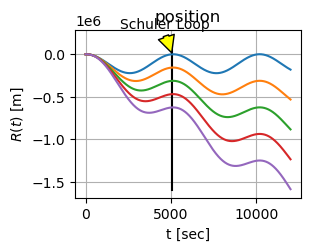

In [5]:
plt.subplot(221)
plt.title('position')
plt.xlabel('t [sec]')
plt.ylabel(r'$R(t)$ [m]')
plt.plot([5046,5046],[-1600000,200000],'black')
plt.plot(arr01)
plt.plot(arr11)
plt.plot(arr21)
plt.plot(arr31)
plt.plot(arr41)
plt.grid(True)
plt.annotate('Schuler Loop', xy=(5064,5064), xytext=(2000, 300000),
            arrowprops=dict(facecolor='yellow', shrink=0.05),)

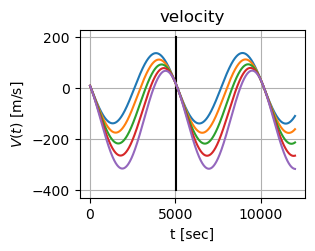

In [6]:
plt.subplot(222)
plt.title('velocity')
plt.xlabel('t [sec]')
plt.ylabel(r'$V(t)$ [m/s]')
plt.plot([5046,5046],[-400,200],'black')
plt.plot(arr02)
plt.plot(arr12)
plt.plot(arr22)
plt.plot(arr32)
plt.plot(arr42)
plt.grid(True)

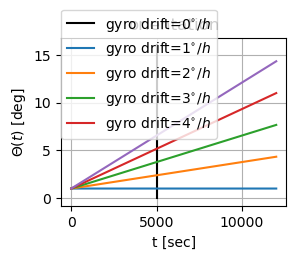

In [7]:
plt.subplot(223)
plt.title('orientation')
plt.xlabel('t [sec]')
plt.ylabel(r'$\Theta(t)$ [deg]')
plt.plot([5046,5046],[0,16],'black')
plt.plot(arr03)
plt.plot(arr13)
plt.plot(arr23)
plt.plot(arr33)
plt.plot(arr43)
plt.grid(True)
plt.legend((r'gyro drift=$0^{\circ}/h$',
            r'gyro drift=$1^{\circ}/h$',
            r'gyro drift=$2^{\circ}/h$',
            r'gyro drift=$3^{\circ}/h$',
            r'gyro drift=$4^{\circ}/h$'),loc=(0.0,0.4))

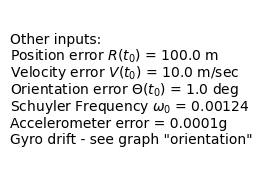

In [8]:
plt.subplot(224)
plt.axis('off')
plt.text(0, 0.8, 'Other inputs:')
plt.text(0, 0.7, 'Position error $R(t_0)$ = 100.0 m')    
plt.text(0, 0.6, 'Velocity error $V(t_0)$ = 10.0 m/sec')       
plt.text(0, 0.5, 'Orientation error $\Theta(t_0)$ = 1.0 deg')
plt.text(0, 0.4, r'Schuyler Frequency $\omega_{0}$ = 0.00124')
plt.text(0, 0.3, 'Accelerometer error = 0.0001g')
plt.text(0, 0.2, 'Gyro drift - see graph "orientation"')

plt.show()